# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

**План:**
1. Изучите общую информацию о фалей с данными
2. Выполнить предобработку данных(удаление пропущеных значений,где это возможно,при необходимости изменение типа данных,
   выявление явных и неявных дубликатов,устранение редких и выбивающихся значений)
3. Добавление столбцов для дальнейшего анализа данных
4. Проведение исследовательского анализа для выполнения задач
5. Вывод

**Задачи:**
1. Изучить, как быстро продавались квартиры.
2. Какие факторы больше всего влияют на общую (полную) стоимость объекта.
3. Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра.
4. Описать, как стоимость объектов зависит от расстояния до центра города.

### Откройте файл с данными и изучите общую информацию.

In [ ]:
import pandas as pd # импортируем библиотеки
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pylab

In [ ]:
data = pd.read_csv('/datasets/real_estate_data.csv',sep='\t') # читаем файл csv

In [ ]:
display(data.head(20)) # выводим первые 20 строк датафрейма

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [ ]:
data.info() #получем основную информацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [ ]:
display(data.describe()) # анализируем  числовые столбцы таблицы

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


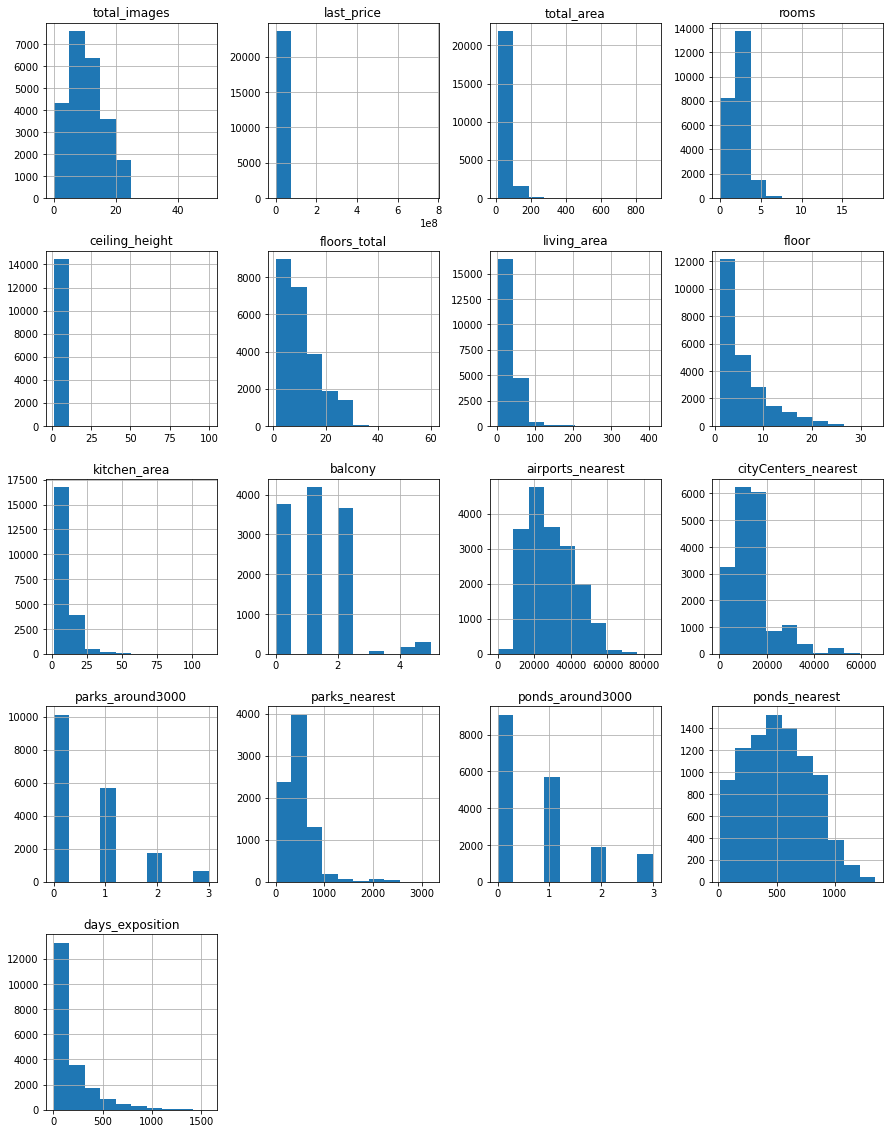

In [ ]:
data.hist(figsize=(15, 20)); # строим общую гистограмму для всех числовых столбцов

### Предобработка данных

In [ ]:
print(data.isna().sum()) # выяыляем количество пропущенных значений для каждого столбца

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


In [ ]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')
        );
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

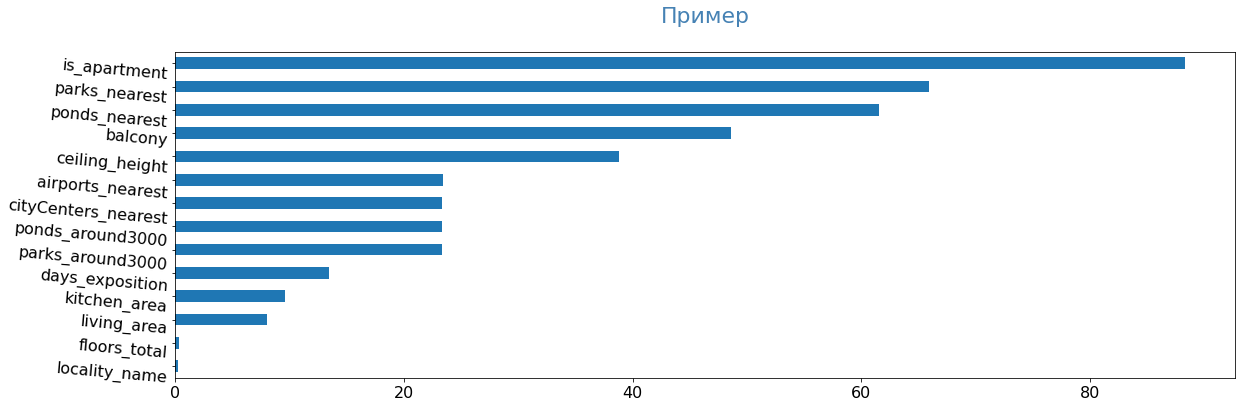

In [ ]:
pass_value_barh(data)

In [ ]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') # меняем на верный формат для времени
print(data['first_day_exposition'].head())


0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]


In [ ]:
data.dropna(subset=['floors_total'], inplace=True)
data['floors_total'] = data['floors_total'].astype('int') # переводим из float в int

In [ ]:
data['is_apartment'] = data['is_apartment'].astype('bool') # переводим из object в bool

In [ ]:
data['balcony'] = data['balcony'].fillna(0) # заменяем пропуски на 0
data['balcony'] = data['balcony'].astype('int')

In [ ]:
data['last_price'] = data['last_price'].astype('int')

In [ ]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(0)

In [ ]:
data['days_exposition'].fillna(9999, inplace=True)
data['days_exposition'] = data['days_exposition'].astype('int') #заменим пропуски в days_exposition и заменим тип данных

In [ ]:
data.dropna(subset=['locality_name'], inplace=True) # Удаляем записи, где отсутствует локация, всего 86 значений


In [ ]:
living_ratio = data['living_area'].mean() / data['total_area'].mean()
data['living_area'].fillna(living_ratio * data['total_area'], inplace=True)


In [ ]:
kitchen_ratio = data['kitchen_area'].mean() / data['total_area'].mean()
data['kitchen_area'].fillna(kitchen_ratio * data['total_area'], inplace=True) # заполняем пропуски площади кухни


In [ ]:
data['total_area']*0.9 <= (data['living_area'] + data['kitchen_area'])

0        False
1        False
2        False
3        False
4        False
         ...  
23694    False
23695    False
23696    False
23697    False
23698    False
Length: 23565, dtype: bool

In [ ]:
# check
data[data['total_area']*0.9 <= (data['living_area'] + data['kitchen_area'])]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
41,16,7900000,74.0,2016-05-04,3,NaN,14,59.0,8,False,...,12.00000,5,Санкт-Петербург,37715.0,12612.0,1.0,725.0,1.0,759.0,179
171,6,3800000,49.0,2019-02-22,2,2.50,9,38.0,8,True,...,10.00000,1,посёлок Шушары,18471.0,24272.0,0.0,NaN,0.0,NaN,11
184,7,2600000,30.2,2018-02-14,1,2.65,9,26.1,5,True,...,6.20000,0,Санкт-Петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12
220,8,3890000,37.0,2018-07-09,1,2.50,25,28.0,6,True,...,9.00000,0,Санкт-Петербург,25408.0,16166.0,0.0,NaN,0.0,NaN,28
319,19,4850000,59.7,2015-03-19,3,2.50,5,47.4,4,True,...,6.40000,1,Санкт-Петербург,43095.0,15599.0,0.0,NaN,0.0,NaN,974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23297,10,1850000,48.2,2019-03-13,2,NaN,5,42.2,2,True,...,6.00000,1,Высоцк,NaN,0.0,NaN,NaN,NaN,NaN,45
23328,12,4299000,54.0,2016-11-25,2,NaN,14,40.0,8,True,...,10.00000,0,Колпино,25612.0,31399.0,0.0,NaN,0.0,NaN,343
23521,13,8500000,65.0,2018-11-01,2,NaN,4,44.0,2,True,...,15.30000,0,Санкт-Петербург,22276.0,3996.0,1.0,627.0,0.0,NaN,9999
23579,7,2350000,24.8,2018-06-07,1,NaN,10,18.0,2,True,...,4.34185,0,Кудрово,NaN,0.0,NaN,NaN,NaN,NaN,89


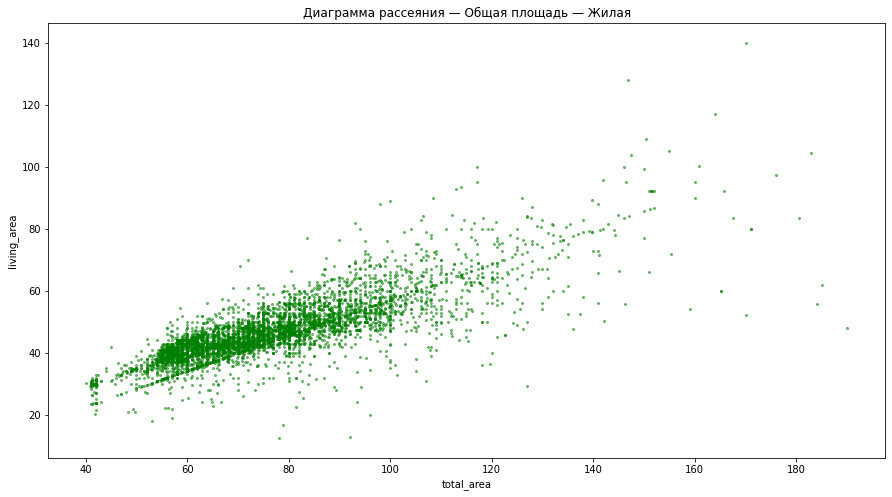

In [ ]:
# check
data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter',
        y='living_area' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'g', s = 4)
plt.title('Диаграмма рассеяния — Общая площадь — Жилая');

In [ ]:
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest         0
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition             0
dtype: int64


In [ ]:
print(data.duplicated().sum()) # определяем наличие дупликатов

0


In [ ]:
print(data['locality_name'].unique()) # определение неявных дубликатов

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

In [ ]:
#устранение неявных дубликатов
data['locality_name'] = data['locality_name'].str.replace('ё','е')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа','городской поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок при железнодорожной стации','поселок станции')
data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое товарищество','садовое товарищество')






In [ ]:
print(data['locality_name'].sort_values(ascending=True).unique()) #проверка устранения неявных дубликатов

['Бокситогорск' 'Волосово' 'Волхов' 'Всеволожск' 'Выборг' 'Высоцк'
 'Гатчина' 'Зеленогорск' 'Ивангород' 'Каменногорск' 'Кингисепп' 'Кириши'
 'Кировск' 'Колпино' 'Коммунар' 'Красное Село' 'Кронштадт' 'Кудрово'
 'Лодейное Поле' 'Ломоносов' 'Луга' 'Любань' 'Мурино' 'Никольское'
 'Новая Ладога' 'Отрадное' 'Павловск' 'Петергоф' 'Пикалево' 'Подпорожье'
 'Приморск' 'Приозерск' 'Пушкин' 'Санкт-Петербург' 'Светогорск'
 'Сертолово' 'Сестрорецк' 'Сланцы' 'Сосновый Бор' 'Сясьстрой' 'Тихвин'
 'Тосно' 'Шлиссельбург' 'городской поселок Большая Ижора'
 'городской поселок Будогощь' 'городской поселок Важины'
 'городской поселок Виллози' 'городской поселок Вознесенье'
 'городской поселок Вырица' 'городской поселок Дружная Горка'
 'городской поселок Дубровка' 'городской поселок Ефимовский'
 'городской поселок Кондратьево' 'городской поселок Красный Бор'
 'городской поселок Кузнечное' 'городской поселок Кузьмоловский'
 'городской поселок Лебяжье' 'городской поселок Лесогорский'
 'городской поселок Мга' 'г

In [ ]:
# check
data['locality_name'].nunique()

323

In [ ]:
# check

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"23,565.00","23,565.00","14,481.00","23,565.00","23,565.00","23,565.00","23,565.00","23,565.00","23,565.00"
min,0.00,12.00,1.00,1.00,"12,190.00",2.00,1.30,1.00,1.00
max,19.00,900.00,100.00,"9,999.00","763,000,000.00",409.70,112.00,33.00,60.00


In [ ]:
data.rooms.value_counts().to_frame()

data['rooms'] = data[data['rooms'] < 7]['rooms']


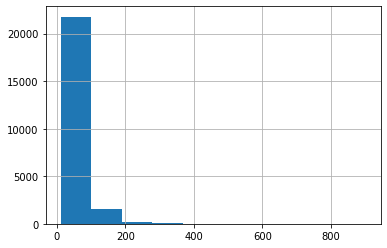

In [ ]:
data.total_area.hist();

data['total_area'] = data[(data['total_area'] >= 25) & (data['total_area'] < 200)]['total_area']

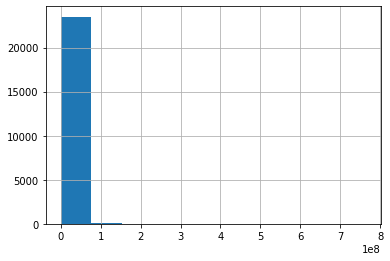

In [ ]:
data.last_price.hist();
data['last_price'] = data[(data['last_price'] > 150_000) &(data['last_price'] < 25_000_000)]['last_price']

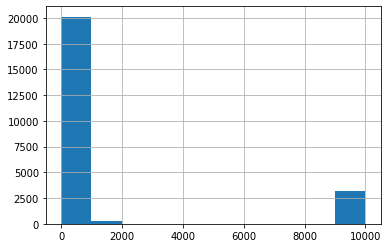

In [ ]:
data.days_exposition.hist();

data['days_exposition'] = data[(data['days_exposition'] > 2) &(data['days_exposition'] < 600)]['days_exposition']


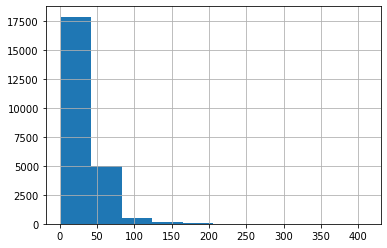

In [ ]:
data.living_area.hist();

data['living_area'] = data[(data['living_area'] > 10) & (data['living_area'] < 100)]['living_area']


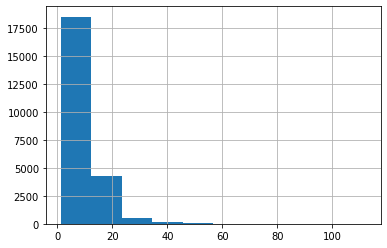

In [ ]:
data.kitchen_area.hist();

data['kitchen_area'] = data[(data['kitchen_area'] > 2 ) & (data['kitchen_area'] < 30 )]['kitchen_area']


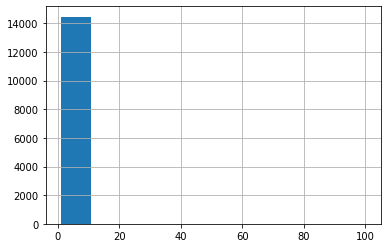

In [ ]:
data.ceiling_height.hist();

data['ceiling_height'] = data[(data['ceiling_height'] > 2) & (data['ceiling_height'] < 4)]['ceiling_height']

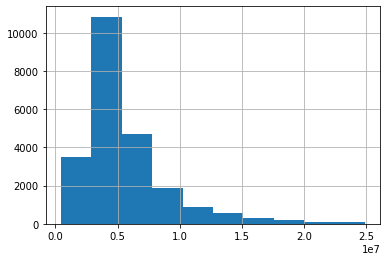

In [ ]:
data.last_price.hist();

data['last_price'] = data[(data['last_price'] > 1000000) & (data['last_price'] < 25000000)]['last_price']

In [ ]:
data.floors_total.value_counts().to_frame()

data['floor'] = data[data['floor'] < 28 ]['floor']


In [ ]:
data.floors_total.value_counts().to_frame()

data['floors_total'] = data[(data['floors_total'] != 34 ) &(data['floors_total'] != 60) & (data['floors_total'] != 52) & (data['floors_total'] != 29) & (data['floors_total'] != 33) & (data['floors_total'] != 37) & (data['floors_total'] != 36)]['floors_total']


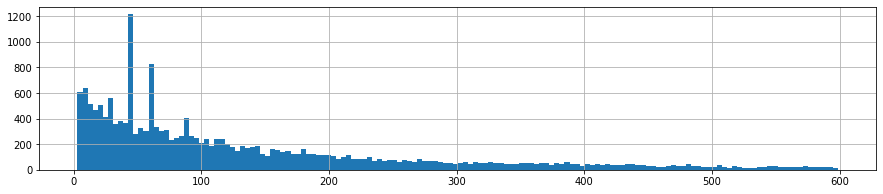

In [ ]:
# check
data.days_exposition.hist(bins = 150, figsize = (15,3));

<AxesSubplot:>

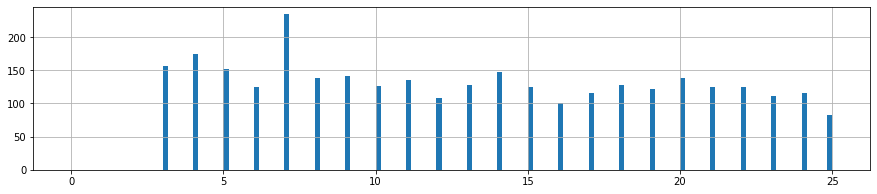

In [ ]:
data.days_exposition.hist(bins = 150, figsize = (15,3),range=(0,25))

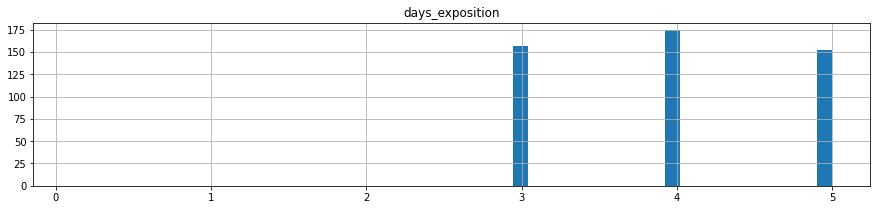

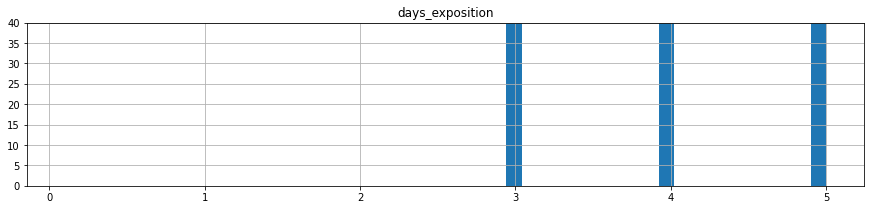

In [ ]:
# check
data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0.1,5));

data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0.1,5))
plt.ylim(0, 40);

In [ ]:
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"23,475.00","23,149.00","14,354.00","19,193.00","22,828.00","23,101.00","23,132.00","23,559.00","23,556.00"
min,0.00,25.00,2.20,3.00,"1,010,000.00",10.08,2.10,1.00,1.00
max,6.00,199.20,3.98,599.00,"24,900,000.00",99.96,29.90,27.00,35.00


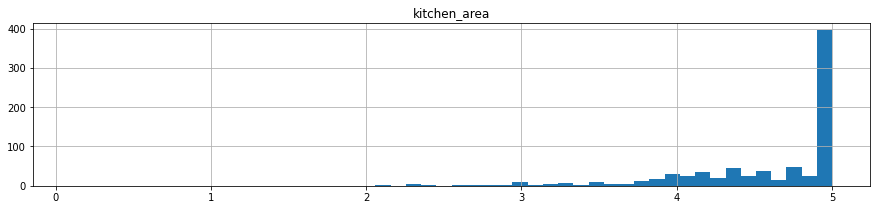

In [ ]:
# check
data.hist(column = 'kitchen_area', bins = 50, figsize = (15,3), range = (0.1,5));

In [ ]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            22828 non-null  float64       
 2   total_area            23149 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23475 non-null  float64       
 5   ceiling_height        14354 non-null  float64       
 6   floors_total          23556 non-null  float64       
 7   living_area           23101 non-null  float64       
 8   floor                 23559 non-null  float64       
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23132 non-null  float64       
 13  balcony         

### Посчитайте и добавьте в таблицу новые столбцы

**Выводы**

 При предобработке данных было выявлено и устранено:

1. Неверный тип данных:
                       first_day_exposition - object - исправлен на datetime
                       floors_total  - float - исправлен на int(так как количество этажей - это целое число)
                       is_apartment - object - исправоен на bool(при исправлении, заполнились пропуски истинными значениями)
                       balcon - float - исправлен на int(так как количество балконов - это целое число)
                       parks_around3000 - float - исправлен на int(так как количество парков - это целое число)
                       days_exposition  - float - исправлен на int(так как количество дней - это целое число)
                       ponds_around3000 - float - исправлен на int(так как количество прудов - это целое число)
                       last_price - float - исправлен на int
                       
  
2. Работа с пропущеными значениями:
                                 locality_name - удалено 86 пропусков(скорее всего данные не указаны самими людьми)
                                 living_area и kitchen_area - пропуски заменены среднее отношение  к жилой      площади и заполнены произведением коэффициента на жилую площадь.
                                 balcon - пропуски заменены 0(скорее всего там, где пропуски балконы просто отсутвуют                                  в квартире)
                                 
                                 
3. Выявление дубликатов:
                        явные дубликаты не выявлены
                        выявлены и устранены не явные дубликаты в locality_name
  
4. Устранение редких и выбивающихся значений:
                                  'rooms', 'total_area', 'ceiling_height', 'days_exposition',     'last_price','living_area','kitchen_area', 'floor',   'floors_total - выполнен срез                                        данных для более адекватной информации

In [ ]:
data['price_square_meter'] = data['last_price'] / data['total_area'] #подсчет цены за один квадратный метр

In [ ]:
data['day'] = data['first_day_exposition'].dt.weekday # столбец дня недели
data['month'] = data['first_day_exposition'].dt.month # столбец месяца
data['year'] = data['first_day_exposition'].dt.year # столбец год

week_days = ('понедельник', 'вторник', 'среда', 'четверг', 'пятница', 'суббота', 'воскресенье')
data['category_day'] = data['day'].apply(lambda n: week_days[n]) # столбец день недели

In [ ]:
def category_floor(row):  # тип этажа квартир
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'

data['category_floor'] = data.apply(category_floor, axis = 1)

In [ ]:
# из м в км и округлить до целых значений

data['cityCenters_nearest_km'] = data['cityCenters_nearest'] / 1000
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].astype('int')





### Проведите исследовательский анализ данных

count    23149.000000
mean        58.416737
std         26.355054
min         25.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        199.200000
Name: total_area, dtype: float64

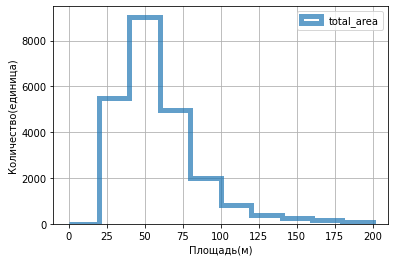

In [ ]:
data.plot(
    kind='hist',
    y='total_area',
    histtype='step',
    range=(0, 200),
    bins=10,
    linewidth=5,
    alpha=0.7,
    label='total_area',
    grid=True,
    legend=True,
);

plt.xlabel('Площадь(м)', fontsize=10)
plt.ylabel('Количество(единица)', fontsize=10);

data['total_area'].describe()



count    23101.000000
mean        32.727517
std         15.687675
min         10.080000
25%         19.000000
50%         30.000000
75%         41.700000
max         99.955430
Name: living_area, dtype: float64

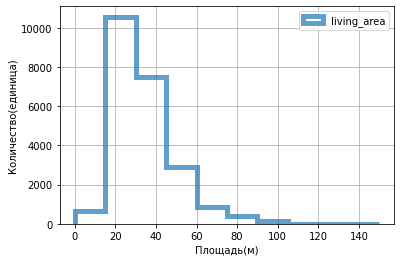

In [ ]:
data.plot(
    kind='hist',
    y='living_area',
    histtype='step',
    range=(0, 150),
    bins=10,
    linewidth=5,
    alpha=0.7,
    label='living_area',
    grid=True,
    legend=True,
);

plt.xlabel('Площадь(м)', fontsize=10)
plt.ylabel('Количество(единица)', fontsize=10);

data['living_area'].describe()


count    23132.000000
mean         9.946014
std          4.110160
min          2.100895
25%          7.000000
50%          9.000000
75%         11.600000
max         29.900000
Name: kitchen_area, dtype: float64

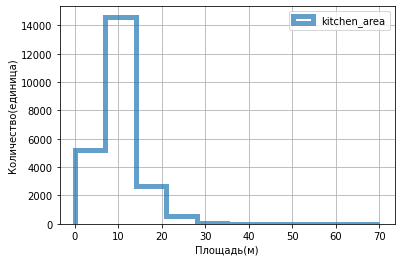

In [ ]:
data.plot(
    kind='hist',
    y='kitchen_area',
    histtype='step',
    range=(0, 70),
    bins=10,
    linewidth=5,
    alpha=0.7,
    label='kitchen_area',
    grid=True,
    legend=True,
);

plt.xlabel('Площадь(м)', fontsize=10)
plt.ylabel('Количество(единица)', fontsize=10);

data['kitchen_area'].describe()

count    2.282800e+04
mean     5.625721e+06
std      3.573252e+06
min      1.010000e+06
25%      3.450000e+06
50%      4.600000e+06
75%      6.600000e+06
max      2.490000e+07
Name: last_price, dtype: float64

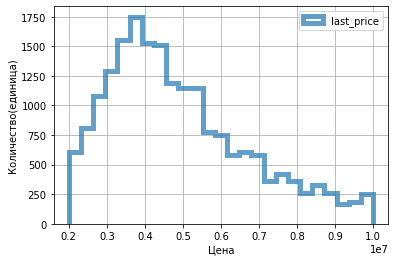

In [ ]:
data.plot(
    kind='hist',
    y='last_price',
    histtype='step',
    range=(2000000, 10000000),
    bins=25,
    linewidth=5,
    alpha=0.7,
    label='last_price',
    grid=True,
    legend=True,
);

plt.xlabel('Цена', fontsize=10)
plt.ylabel('Количество(единица)', fontsize=10);

data['last_price'].describe()


count    23475.000000
mean         2.047796
std          1.006547
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

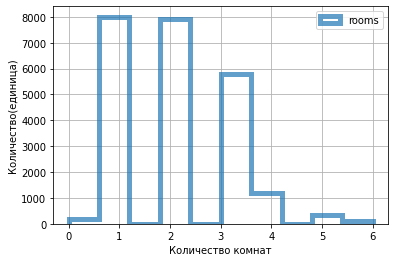

In [ ]:
data.plot(
    kind='hist',
    y='rooms',
    histtype='step',
    bins=10,
    linewidth=5,
    alpha=0.7,
    label='rooms',
    grid=True,
    legend=True,
);

plt.xlabel('Количество комнат', fontsize=10)
plt.ylabel('Количество(единица)', fontsize=10);

data['rooms'].describe()



count    14354.000000
mean         2.717870
std          0.249021
min          2.200000
25%          2.510000
50%          2.650000
75%          2.800000
max          3.980000
Name: ceiling_height, dtype: float64

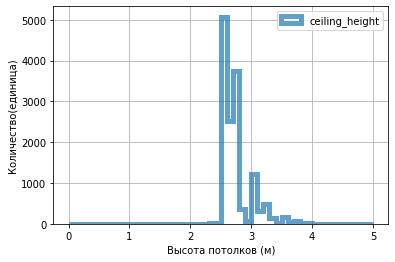

In [ ]:
data.plot(
    kind='hist',
    y='ceiling_height',
    histtype='step',
    range=(0, 5),
    bins=50,
    linewidth=5,
    alpha=0.7,
    label='ceiling_height',
    grid=True,
    legend=True,
);

plt.xlabel('Высота потолков (м)', fontsize=10)
plt.ylabel('Количество(единица)', fontsize=10);

data['ceiling_height'].describe()


count    23556.000000
mean        10.664969
std          6.569841
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         35.000000
Name: floors_total, dtype: float64

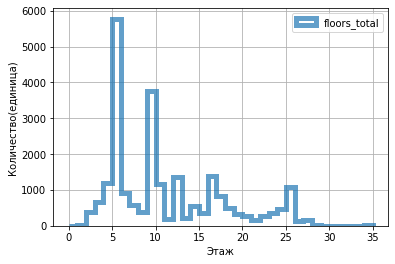

In [ ]:
data.plot(
    kind='hist',
    y='floors_total',
    histtype='step',
    range=(0, 35),
    bins=35,
    linewidth=5,
    alpha=0.7,
    label='floors_total',
    grid=True,
    legend=True,
);

plt.xlabel('Этаж', fontsize=10)
plt.ylabel('Количество(единица)', fontsize=10);

data['floors_total'].describe()


count    23559.000000
mean         5.871854
std          4.856154
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         27.000000
Name: floor, dtype: float64

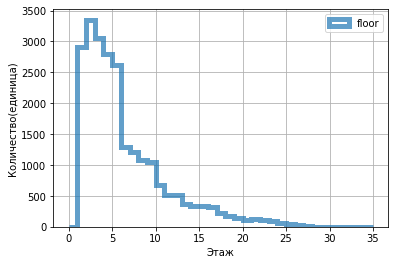

In [ ]:
data.plot(
    kind='hist',
    y='floor',
    histtype='step',
    range=(0, 35),
    bins=35,
    linewidth=5,
    alpha=0.7,
    label='floor',
    grid=True,
    legend=True,
);

plt.xlabel('Этаж', fontsize=10)
plt.ylabel('Количество(единица)', fontsize=10);

data['floor'].describe()

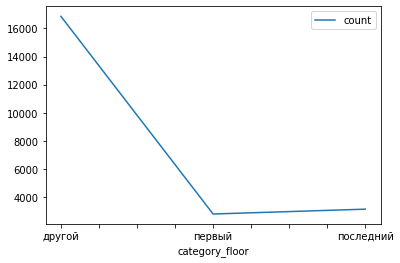

In [ ]:
price_from_floor_category = data.pivot_table(index = 'category_floor', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
price_from_floor_category.columns = ['mean', 'count', 'median']
price_from_floor_category .plot(y = 'count');

count    23565.000000
mean        10.498960
std          9.512143
min          0.000000
25%          2.000000
50%         11.000000
75%         15.000000
max         65.000000
Name: cityCenters_nearest_km, dtype: float64

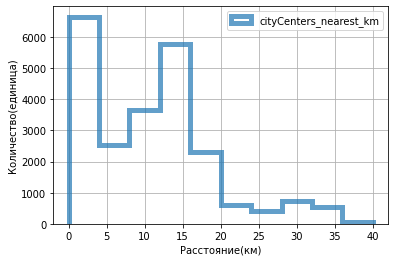

In [ ]:
data.plot(
    kind='hist',
    y='cityCenters_nearest_km',
    histtype='step',
    range=(0, 40),
    bins=10,
    linewidth=5,
    alpha=0.7,
    label='cityCenters_nearest_km',
    grid=True,
    legend=True,
);

plt.xlabel('Расстояние(км)', fontsize=10)
plt.ylabel('Количество(единица)', fontsize=10);

data['cityCenters_nearest_km'].describe()



count    18041.000000
mean     28797.082701
std      12632.499735
min          0.000000
25%      18565.000000
50%      26757.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

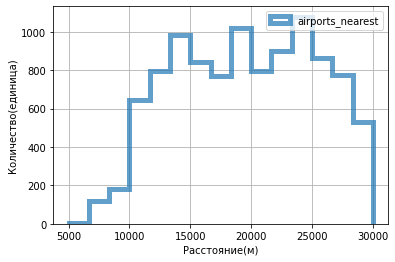

In [ ]:
data.plot(
    kind='hist',
    y='airports_nearest',
    histtype='step',
    range=(5000, 30000),
    bins=15,
    linewidth=5,
    alpha=0.7,
    label='airports_nearest',
    grid=True,
    legend=True,
);

plt.xlabel('Расстояние(м)', fontsize=10)
plt.ylabel('Количество(единица)', fontsize=10);

data['airports_nearest'].describe()


count    8030.000000
mean      490.580448
std       341.572956
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

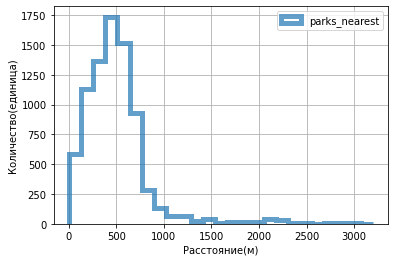

In [ ]:
data.plot(
    kind='hist',
    y='parks_nearest',
    histtype='step',
    range=(0, 3200),
    bins=25,
    linewidth=5,
    alpha=0.7,
    label='parks_nearest',
    grid=True,
    legend=True,
);

plt.xlabel('Расстояние(м)', fontsize=10)
plt.ylabel('Количество(единица)', fontsize=10);

data['parks_nearest'].describe()


count    23565.000000
mean         2.567367
std          1.788279
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: day, dtype: float64

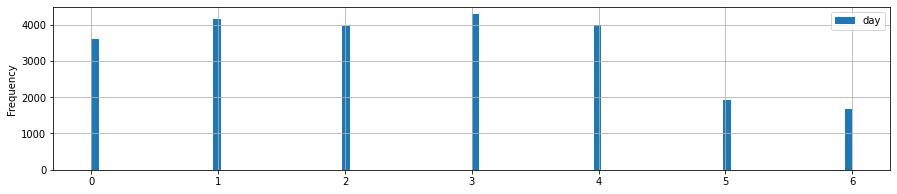

In [ ]:
data.plot(y = 'day', kind = 'hist', bins = 100, grid=True, range = (0,6), figsize = (15,3))
data['day'].describe()

count    23565.000000
mean         6.401570
std          3.492948
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64

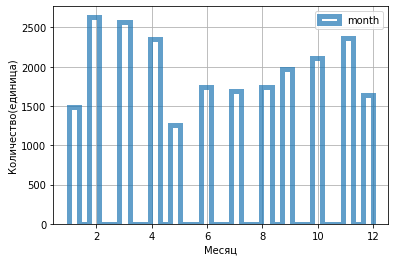

In [ ]:
data.plot(
    kind='hist',
    y='month',
    histtype='step',
    range = (1,12),
    bins=30,
    linewidth=5,
    alpha=0.7,
    label='month',
    grid=True,
    legend=True,
);

plt.xlabel('Месяц', fontsize=10)
plt.ylabel('Количество(единица)', fontsize=10);

data['month'].describe()


count    23565.000000
mean      2017.371016
std          1.037393
min       2014.000000
25%       2017.000000
50%       2017.000000
75%       2018.000000
max       2019.000000
Name: year, dtype: float64

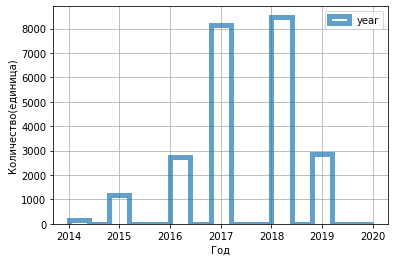

In [ ]:
data.plot(
    kind='hist',
    y='year',
    histtype='step',
    range = (2014,2020),
    bins=15,
    linewidth=5,
    alpha=0.7,
    label='year',
    grid=True,
    legend=True,
);

plt.xlabel('Год', fontsize=10)
plt.ylabel('Количество(единица)', fontsize=10);

data['year'].describe()


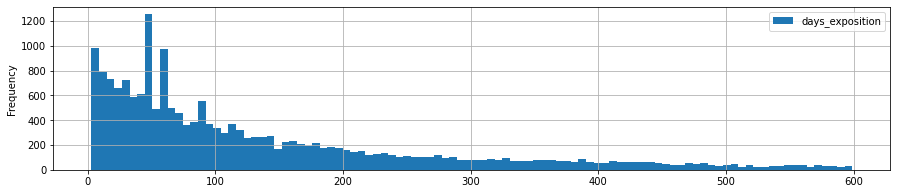

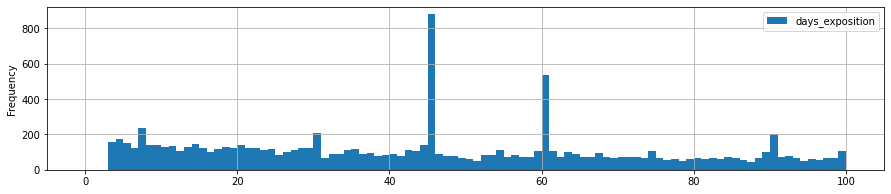

In [ ]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid=True, figsize = (15,3));
data['days_exposition'].describe()
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid=True, range = (0,100), figsize = (15,3));


Стоит обратить внимание,что данные имеют пики на 45,60 и 90 дней.
При просмотре правил размещения объявлений в Яндекс Недвижимость, оказалось что именно после этих сроков объявление считается неактуальным и снимается автоматически.
Так что здесь также будет оправданным удаление этих продаж из среза, так как они искажают картину с реально проданными квартирами.

In [ ]:
print(data['days_exposition'].median())
print(data['days_exposition'].mean())

89.0
138.89928619809305


**Вывод**:
Общая площадь в нашей выборке колеблется от 25 до 199 м2, среднее значение 56. Распределение данных Гаусса.

Цены на недвижимость имеют среднее значение в 5,5 млн руб.

Количество комнат колеблется от 0(скорее всего отражает студии) до 6. Больше всего однокомнатных квартир. Так же стоит отметить, что 2/3 всего анализируемого рынка состоит из 1-х и 2-х комнатных квавртир

Высота потолков в среднем составляет 2,77 м.

Единичные вбросы успешно отфильтрованы ранее.

Медиана срока размещения обьявления 99 дней, среднее 146 дней. Стоит обратить внимание,что данные имеют пики на 45,60 и 90 дней.
При просмотре правил размещения объявлений в Яндекс Недвижимость, оказалось что именно после этих сроков объявление считается неактуальным и снимается автоматически.
Так что здесь также будет оправданным удаление этих продаж из среза, так как они искажают картину с реально проданными квартирами.


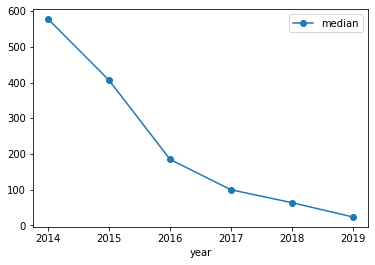

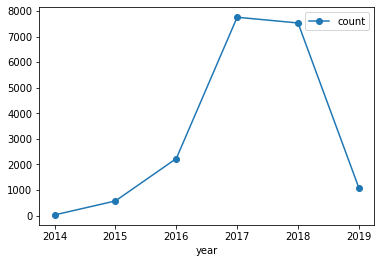

In [ ]:
days_exposition_years = data.pivot_table(index = 'year', values = 'days_exposition', aggfunc = ['mean', 'count', 'median'])
days_exposition_years.columns = ['mean', 'count', 'median']
days_exposition_years.plot(y = 'median', style = 'o-');
days_exposition_years.plot(y = 'count', style = 'o-');

По данным графикам видно, что средняя скорость продажи с 2014 по 209 падала, однако количество обьявлений с 2014 по 2017 наоборот росло, возможно предложение привысило спрос.

In [ ]:
# check
data['days_exposition'].describe()

count    19193.000000
mean       138.899286
std        136.764999
min          3.000000
25%         42.000000
50%         89.000000
75%        194.000000
max        599.000000
Name: days_exposition, dtype: float64

0.7819335608985245

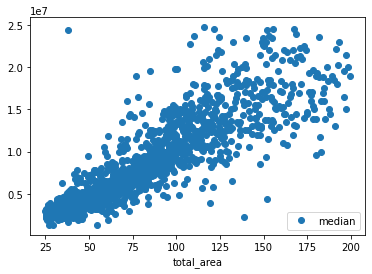

In [ ]:
price_from_area = data.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
price_from_area.columns = ['mean', 'count', 'median']
price_from_area.plot(y = 'median', style = 'o')

price_from_area.sort_values('median', ascending = False)

data['total_area'].corr(data['last_price'])

**Вывод:** Зависимость высокая - согласно корреляции Пирсона - 0,7.

0.6594852156224421

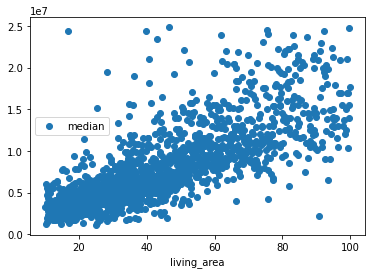

In [ ]:
price_from_area = data.pivot_table(index = 'living_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
price_from_area.columns = ['mean', 'count', 'median']
price_from_area.plot(y = 'median', style = 'o')

price_from_area.sort_values('median', ascending = False)

data['living_area'].corr(data['last_price'])

**Вывод:** Зависимость средняя - согласно корреляции Пирсона - 0,6.

0.5882498718902817

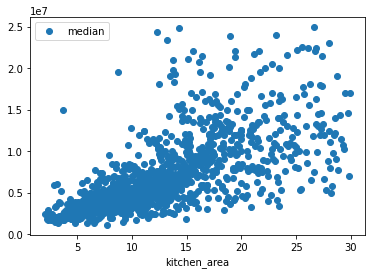

In [ ]:
price_from_area = data.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
price_from_area.columns = ['mean', 'count', 'median']
price_from_area.plot(y = 'median', style = 'o')

price_from_area.sort_values('median', ascending = False)

data['kitchen_area'].corr(data['last_price'])


**Вывод:** Зависимость средняя - согласно корреляции Пирсона - 0,6.

0.5049077105195681

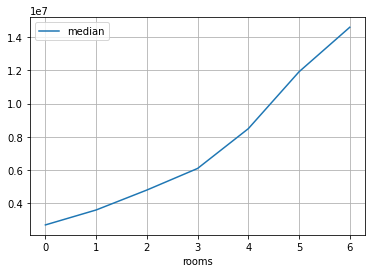

In [ ]:
price_from_rooms = data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
price_from_rooms.columns = ['mean', 'count', 'median']
price_from_rooms.plot(y = 'median',grid=True)
price_from_rooms.sort_values('median', ascending = False)

data['rooms'].corr(data['last_price'])

                        mean  count     median
category_floor                                
другой          5.834805e+06  16863  4800000.0
первый          4.586846e+06   2804  3950000.0
последний       5.427633e+06   3149  4300000.0


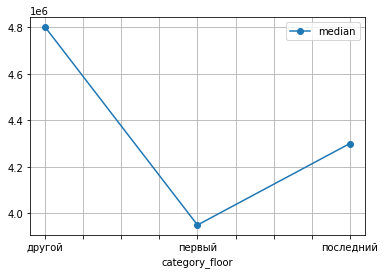

In [ ]:
price_from_floor_category = data.pivot_table(index = 'category_floor', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
price_from_floor_category.columns = ['mean', 'count', 'median']
price_from_floor_category .plot(y = 'median', style = 'o-',grid=True)
print(price_from_floor_category)

**Вывод**: Согласно медиане - как правило квартиры на первом этаже дешевле квартир на последнем этаже - в среднем на 7%. А так же можно сделать вывод, что первый и последний этаж дешевле,чем другие этажи.

,mean,count,median
category_day,,,
вторник,5.649188e+06,4056,4700000.0
среда,5.720534e+06,3822,4670000.0
понедельник,5.610827e+06,3486,4600000.0
четверг,5.736971e+06,4125,4600000.0
пятница,5.542954e+06,3866,4550000.0
суббота,5.456901e+06,1842,4550000.0
воскресенье,5.482496e+06,1631,4500000.0


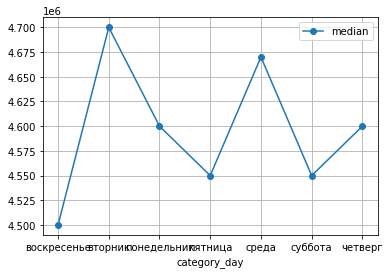

In [ ]:
price_from_category_day = data.pivot_table(index = 'category_day', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
price_from_category_day.columns = ['mean', 'count', 'median']
price_from_category_day.plot(y = 'median', style = 'o-',grid=True)

price_from_category_day.sort_values('median', ascending = False)

**Вывод**: видим, что во вторник выставлены объявления  в среднем выше по  стоимости, но незначительно! В выходные стоимость самая низкая.

Полагаю, что стоимость выставленной на продажу недвижимости зависит от общей активности людей, так как именно в рабочие дни мы видим более высокие цены. Возможно это связано с тем, что люди более активно используют интернет ресурс в рабочее время, чем в выходные.

,mean,count,median
month,,,
4,5.749585e+06,2296,4800000.0
9,5.785827e+06,1912,4690000.0
11,5.653599e+06,2284,4650000.0
2,5.659695e+06,2553,4644000.0
12,5.623613e+06,1578,4616000.0
3,5.579502e+06,2500,4605000.0
1,5.681896e+06,1432,4600000.0
7,5.627930e+06,1631,4600000.0
8,5.536988e+06,1685,4550000.0


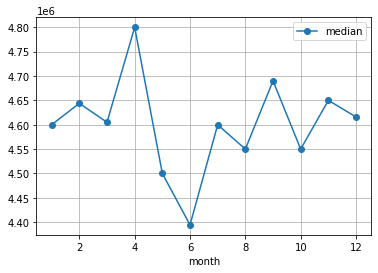

In [ ]:
price_from_category_day = data.pivot_table(index = 'month', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
price_from_category_day.columns = ['mean', 'count', 'median']
price_from_category_day.plot(y = 'median', style = 'o-',grid=True)

price_from_category_day.sort_values('median', ascending = False)

**Вывод:** самая высокая стоимость метра в апреле и сентябре. Самая низкая стоимость метра в июне и августе. Скорее всего рынку недвижемости, как и многим другим сфера присуща сезонность.  Соответсвенно летом на рынке отсутсвует активность покупателей, в связи с сезоном отпусков.

,mean,count,median
year,,,
2014,8.654535e+06,122,6950000.0
2015,6.413528e+06,1106,5198000.0
2019,5.940475e+06,2779,5000000.0
2018,5.482076e+06,8254,4555000.0
2016,5.629498e+06,2649,4500000.0
2017,5.507018e+06,7918,4499000.0


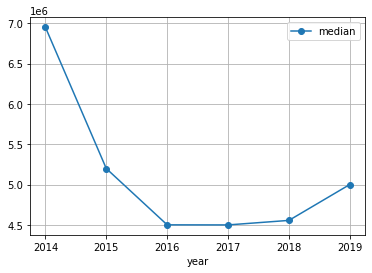

In [ ]:
price_from_category_day = data.pivot_table(index = 'year', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
price_from_category_day.columns = ['mean', 'count', 'median']
price_from_category_day.plot(y = 'median', style = 'o-',grid=True)

price_from_category_day.sort_values('median', ascending = False)

,mean,count,median
year,,,
2014,82.546842,133,76.00
2015,66.645915,1131,60.00
2016,60.009272,2692,53.00
2019,57.571955,2828,52.00
2017,58.437626,8021,51.73
2018,56.669120,8344,50.60


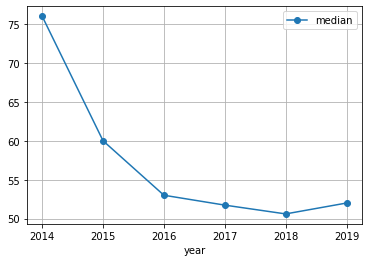

In [ ]:
total_area_years = data.pivot_table(index = 'year', values = 'total_area', aggfunc = ['mean', 'count', 'median'])
total_area_years.columns = ['mean', 'count', 'median']
total_area_years.plot(y = 'median', style = 'o-',grid=True);
total_area_years.sort_values('median', ascending = False)

На графике видно, что с 2014 года по 2016 происходило снижение цены на недвижимость, возможно это связано с валютным экономическим кризимои 2014 года, когда существенно изменились макроэкономические условия — произошла девальвация рубля, ключевая ставка поднялась до 17%, резко выросла инфляция, в 2017 году экономическая ситуация  стабилизируется, что отражено на графике,а дальше идет незначительный рост.
Так же повлиять на цены по годам могла активно начавшиеся застройка многоэтажными домами в 2010 году, которая привела к увелечению количества предложений, что потверждаеться вторым графиком. Так же рост онлайн сервисов для продажи недвижимости могли повлиять на цену. Так же в средней происходило снижение общей площади квартир, в 2018 мы видим прекращение снижение площади квартир, на фоне чего цена тоже стабилизируеться.

In [ ]:
locality_price_meter = data.pivot_table(index = 'locality_name', values = 'price_square_meter',  aggfunc=['count', 'mean'])
locality_price_meter.columns = ['count', 'mean']
locality_price_meter = locality_price_meter.sort_values('count', ascending = False).head(10)

locality_price_meter




,count,mean
locality_name,,
Санкт-Петербург,15025,109558.080843
поселок Мурино,520,84951.028193
поселок Шушары,434,78181.912186
Всеволожск,393,68694.149934
Пушкин,360,102182.886373
Колпино,336,75239.590783
поселок Парголово,325,90430.721268
Гатчина,306,68935.194838
деревня Кудрово,286,92116.747438


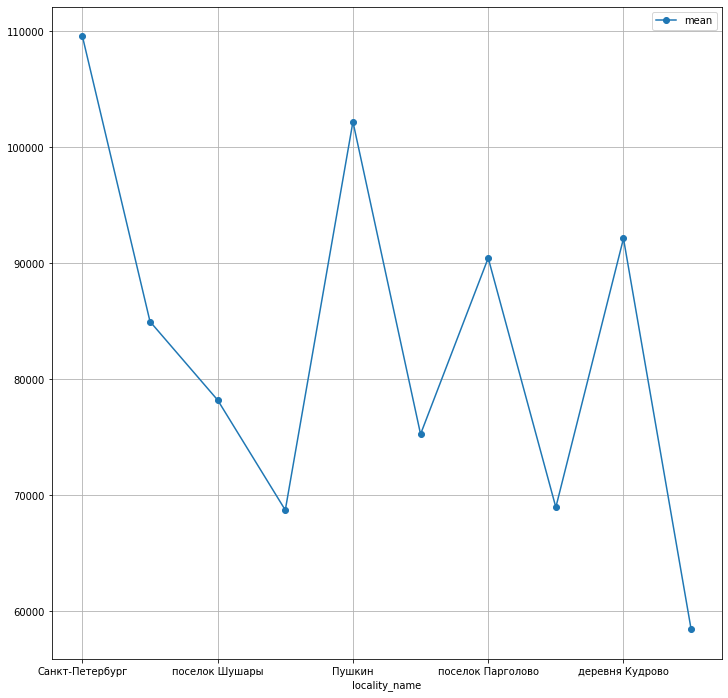

In [ ]:
locality_price_meter.plot(y = 'mean', style = 'o-',grid=True);
plt.gcf().set_size_inches(12,12);

**Вывод:**  Самая высокая стоимость Санкт-Петербурге,самая низкая в Выборге

In [ ]:
center_spb = data.query('locality_name == "Санкт-Петербург"')
center_spb_km = center_spb.pivot_table(index='cityCenters_nearest_km', values='price_square_meter', aggfunc='mean')


center_spb_km








,price_square_meter
cityCenters_nearest_km,
0,128085.320705
1,129674.327911
2,120499.960960
3,117116.642863
4,127992.973156
5,127807.662445
6,129141.902424
7,126449.804428
8,118515.786886


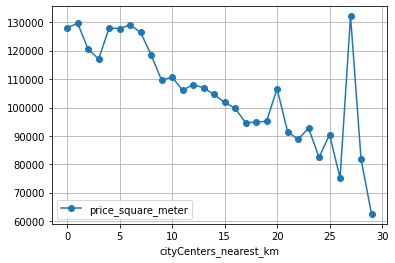

In [ ]:
center_spb_km.plot(style = 'o-',grid=True);

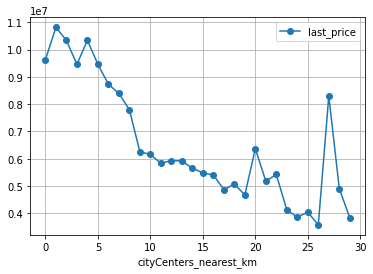

In [ ]:
center_spb = data.query('locality_name == "Санкт-Петербург"')
center_spb_km_total = center_spb.pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='mean')

center_spb_km_total.plot(style = 'o-',grid=True);

In [ ]:
center_spb.query('cityCenters_nearest_km == 27').sort_values(by='cityCenters_nearest_km', ascending=False)



,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,day,month,year,category_day,category_floor,cityCenters_nearest_km
748,13,14350000.0,74.0,2017-11-28,2.0,3.13,5.0,30.0,3.0,True,...,0.0,NaN,128.0,193918.918919,1,11,2017,вторник,другой,27
5961,6,2250000.0,32.0,2018-02-27,1.0,NaN,2.0,16.5,2.0,True,...,0.0,NaN,178.0,70312.500000,1,2,2018,вторник,последний,27


Учитывая наличие одной лишь квартиры, которая критично отличаеться по цене, можно предположить, что она внесена ошибочно.



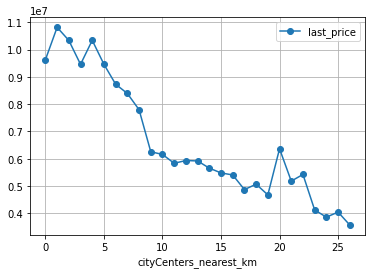

In [ ]:
center_spb = data.query('locality_name == "Санкт-Петербург"')
center_spb_km_total = center_spb.pivot_table(index='cityCenters_nearest_km', values='last_price',
                                             aggfunc='mean')

center_spb_km_total = center_spb_km_total.loc[:26]
center_spb_km_total.plot(style = 'o-',grid=True);




In [ ]:
aparts_in_center = center_spb.query('cityCenters_nearest <= 8000')
print('Квартир по заданым параметрам в центральной зоне Санкт-Петербурга -', aparts_in_center.shape[0], 'квартир')

Квартир по заданым параметрам в центральной зоне Санкт-Петербурга - 3765 квартир


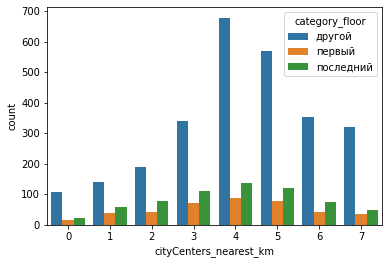

In [ ]:
aparts_in_center_category = aparts_in_center.pivot_table(index='cityCenters_nearest_km', values='category_floor', aggfunc='count')


sns.countplot(x='cityCenters_nearest_km', hue='category_floor', data=aparts_in_center);




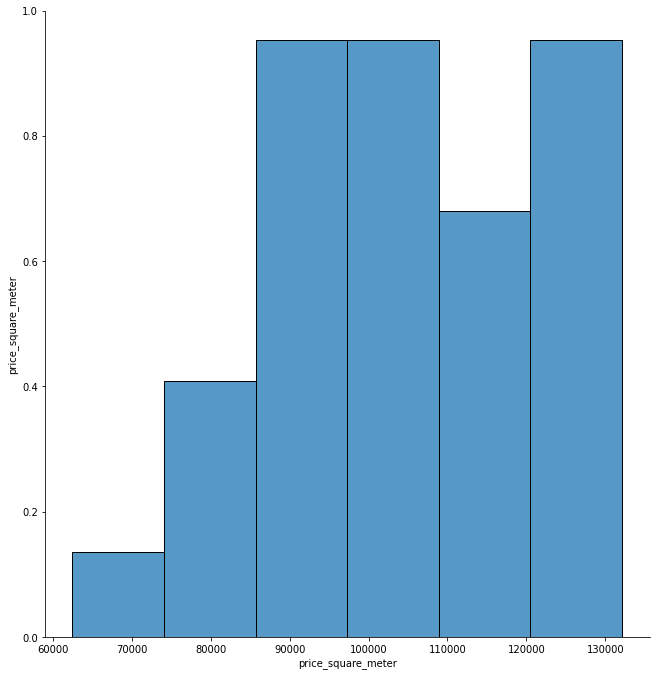

In [ ]:
sns.pairplot(center_spb_km)
plt.gcf().set_size_inches(12,12);

In [ ]:
center_spb_count = center_spb.pivot_table(index='cityCenters_nearest_km', values='price_square_meter', aggfunc='count')
center_spb_count


,price_square_meter
cityCenters_nearest_km,
0,108
1,205
2,266
3,480
4,800
5,647
6,399
7,370
8,646


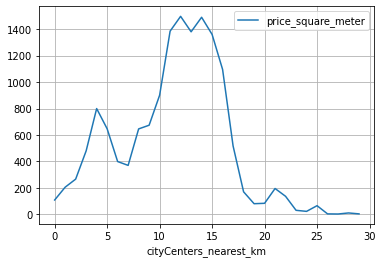

In [ ]:
center_spb_count.plot(grid=True);

**Вывод:** Видно, что есть тенденция в изменени цены в зависимости от растояния от центра,но у близких локаций данная тенденция может не соблюдаться,такое происходит по причине разного количества обьявлений.

### Шаг 5: общий вывод.

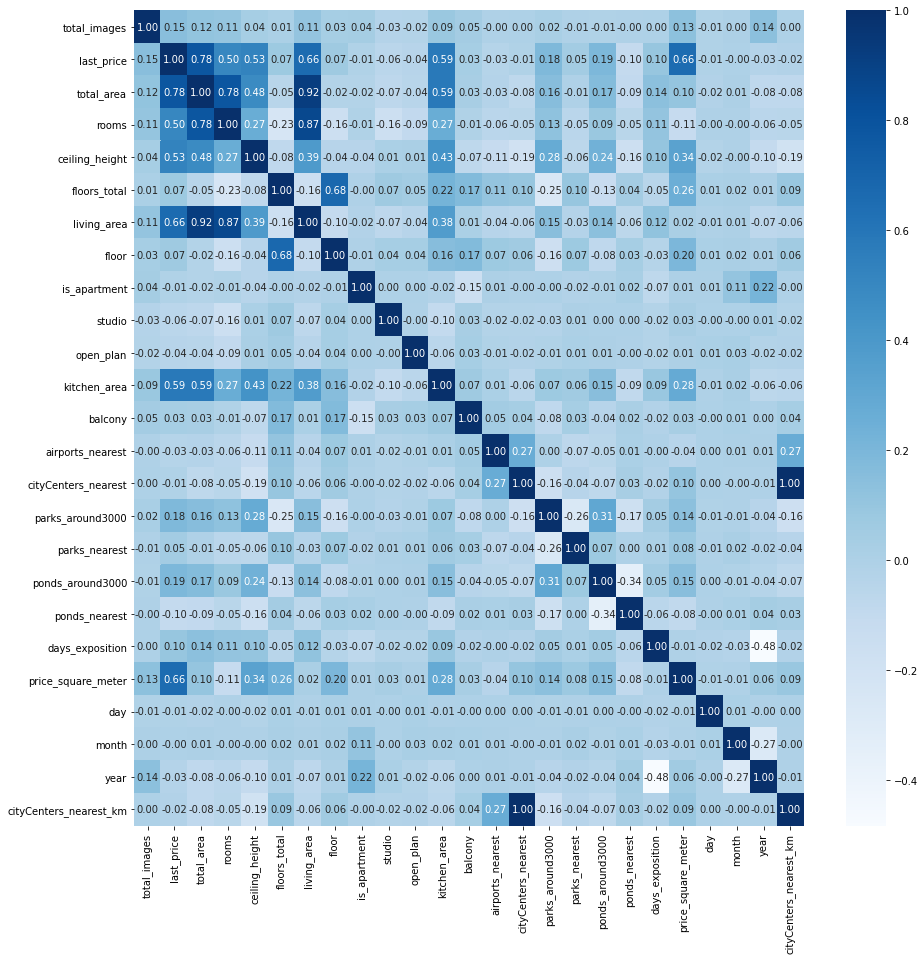

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True, cmap="Blues", fmt='.2f');

Было проведено исследовение, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

Входные данные - база,которая содержится два типа данных: добавленные пользователем и картографические.


Была выполнена необходимая предобработка данных: 1. изменен неверный тип данных. 2. выполнена работа с пропущеными значениями. 3. выявлены и устранены неявные дубликаты. 4. устранены редкие и выбивающихся значений, которые могли бы повлиять на анализ.

Перед проведением исследования были поставлены несколько задач: 1. Изучить, как быстро продавались квартиры. 2. Какие факторы больше всего влияют на общую (полную) стоимость объекта. 3. Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра. 4. Описать, как стоимость объектов зависит от расстояния до центра города.

Медиана срока размещения обьявления 99 дней, среднее 146 дней. Стоит обратить внимание,что данные имеют пики на 45,60 и 90 дней.
При просмотре правил размещения объявлений в Яндекс Недвижимость, оказалось что именно после этих сроков объявление считается неактуальным и снимается автоматически.
Так что здесь также будет оправданным удаление этих продаж из среза, так как они искажают картину с реально проданными квартирами.

Было выявлено, что на стоимость квартиры больше всего влияют дата размещения,площадь,количество комнат и  этаж квартиры,цена за квадратный метр, близость к центру.

Дата размещения  так же играет существенную роль, так как у рынка присутсвует сезонность,а так же дата играет роль, в зависимости от происходящей экономической ситуации в стране. Квартиры, размещенные к продаже в будние дни, в среднем дороже, чем размещенные в выходные.

Зависимость между площадью и ценой на квартиру высокая. Чем больше цена за квадратный метр, тем выше цена. Так же играет роль на каком этаже находится квартира. Квартиры на первом этаже дешевле квартир на последнем этаже - в среднем на 7%. А так же можно сделать вывод, что первый и последний этаж дешевле,чем другие этажи. Чем больше комнат, тем выше цена.

Есть тенденция в изменени цены в зависимости от растояния от центра,но у близких локаций данная тенденция может не соблюдаться, такое происходит по причине разного количества обьявлений. И как мы вяснили, тут роль играет этажность, с 3 по 5 км резко выростает наиболее дорогой тип этажа.

